## Getting the data source

https://www.iposcoop.com/scoop-track-record-from-2000-to-present/



In [1]:
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext signature

In [2]:
wb = xlrd.open_workbook('./data/SCOOP-Rating-Performance.xls')

ws = wb.sheet_by_index(0)

ws.nrows

3367

In [3]:
ipo_list = []
for i in range(36, ws.nrows):
    if isinstance(ws.row(i)[0].value, float):          # check the left most cell is float
        ipo_list.append([x.value for x in ws.row(i)])  # interested the sheet that start with a date
    else:
        print(i, ws.row(i))

36 [empty:'', number:2019.0, empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
62 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
63 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
64 [text:'Trade', empty:'', empty:'', text:'Lead/Joint-Lead', text:'Offer', text:'Opening', text:'1st Day', text:'1st Day', text:'$ Change', text:'$ Change', text:'Star', empty:'']
65 [text:'Date', text:'Issuer', text:'Symbol', text:' Managers', text:'Price', text:'Price', text:'Close', text:'% Px Chng ', text:'Opening', text:'Close', text:'Ratings', text:'Performed']
66 [empty:'', number:2018.0, empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
237 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:''

In [4]:
len(ipo_list)

3231

## Working on the DataFrame

In [5]:
df = pd.DataFrame(ipo_list)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,43473.0,MMTEC,MTC,WestPark Capital,4,5.91,7.55,0.8875,1.91,3.55,N/C,
1,43494.0,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10,10,10.01,0.001,0,0.01,1,
2,43495.0,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20,20,20.2,0.01,0,0.2,1,
3,43496.0,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14,13.25,13.07,-0.0664286,-0.75,-0.93,1,
4,43496.0,Pivotal Acquisition,PVT.U,Cantor,10,10.05,10.1,0.01,0.05,0.1,1,


In [6]:
df.columns = ['Date', 'Company', 'Ticker', 'Managers', \
              'Offer Price', 'Opening Price', '1st Day Close', \
              '1st Day % Chg', '$ Chg Open', '$ Chg Close', \
              'Star Rating', 'Performed']

df.head()

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed
0,43473.0,MMTEC,MTC,WestPark Capital,4,5.91,7.55,0.8875,1.91,3.55,N/C,
1,43494.0,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10,10,10.01,0.001,0,0.01,1,
2,43495.0,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20,20,20.2,0.01,0,0.2,1,
3,43496.0,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14,13.25,13.07,-0.0664286,-0.75,-0.93,1,
4,43496.0,Pivotal Acquisition,PVT.U,Cantor,10,10.05,10.1,0.01,0.05,0.1,1,


In [7]:
def to_date(x):
    return xlrd.xldate_as_datetime(x, wb.datemode)  # using xlrd library's date convert fn() 

df['Date'] = df['Date'].apply(to_date)
df

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed
0,2019-01-08,MMTEC,MTC,WestPark Capital,4,5.91,7.55,0.8875,1.91,3.55,N/C,
1,2019-01-29,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10,10,10.01,0.001,0,0.01,1,
2,2019-01-30,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20,20,20.2,0.01,0,0.2,1,
3,2019-01-31,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14,13.25,13.07,-0.0664286,-0.75,-0.93,1,
4,2019-01-31,Pivotal Acquisition,PVT.U,Cantor,10,10.05,10.1,0.01,0.05,0.1,1,
5,2019-02-01,Gores Metropoulos,GMHIU,Deutsche Bank Securities/ Credit Suisse/ Goldm...,10,10.14,10.12,0.012,0.14,0.12,1,
6,2019-02-06,Wealthbridge Acquisition,HHHHU,Chardan,10,10.01,10.01,0.001,0.01,0.01,1,
7,2019-02-07,Alector,ALEC,Morgan Stanley/ BofA Merrill Lynch/ Cowen/ Bar...,19,18.7,18,-0.0526316,-0.3,-1,2,Missed
8,2019-02-07,Monocle Acquisition,MNCLU,Cowen/ Chardan,10,10,10.01,0.001,0,0.01,1,
9,2019-02-08,Gossamer Bio,GOSS,BofA Merrill Lynch/ Leerink Partners/ Barclays...,16,19,17.94,0.12125,3,1.94,2,


In [8]:
df['Year'], df['Month'], df['Day'], df['Day of Week'] = \
df['Date'].dt.year, df['Date'].dt.month, df['Date'].dt.day, df['Date'].dt.weekday

df

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week
0,2019-01-08,MMTEC,MTC,WestPark Capital,4,5.91,7.55,0.8875,1.91,3.55,N/C,,2019,1,8,1
1,2019-01-29,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10,10,10.01,0.001,0,0.01,1,,2019,1,29,1
2,2019-01-30,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20,20,20.2,0.01,0,0.2,1,,2019,1,30,2
3,2019-01-31,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14,13.25,13.07,-0.0664286,-0.75,-0.93,1,,2019,1,31,3
4,2019-01-31,Pivotal Acquisition,PVT.U,Cantor,10,10.05,10.1,0.01,0.05,0.1,1,,2019,1,31,3
5,2019-02-01,Gores Metropoulos,GMHIU,Deutsche Bank Securities/ Credit Suisse/ Goldm...,10,10.14,10.12,0.012,0.14,0.12,1,,2019,2,1,4
6,2019-02-06,Wealthbridge Acquisition,HHHHU,Chardan,10,10.01,10.01,0.001,0.01,0.01,1,,2019,2,6,2
7,2019-02-07,Alector,ALEC,Morgan Stanley/ BofA Merrill Lynch/ Cowen/ Bar...,19,18.7,18,-0.0526316,-0.3,-1,2,Missed,2019,2,7,3
8,2019-02-07,Monocle Acquisition,MNCLU,Cowen/ Chardan,10,10,10.01,0.001,0,0.01,1,,2019,2,7,3
9,2019-02-08,Gossamer Bio,GOSS,BofA Merrill Lynch/ Leerink Partners/ Barclays...,16,19,17.94,0.12125,3,1.94,2,,2019,2,8,4


In [9]:
# check the data in the DataFrame against the original spreadsheet
by_year_cnt = df.groupby('Year')[['Ticker']].count()

by_year_cnt

,Ticker
Year,
2000,237
2001,94
2002,82
2003,80
2004,233
2005,226
2006,237
2007,256
2008,47


In [10]:
df.iloc[100:110,:]

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week
100,2018-05-24,Kiniksa Pharmaceuticals,KNSA,Goldman Sachs/ J.P. Morgan,18,24.45,19.47,0.0816667,6.45,1.47,3,,2018,5,24,3
101,2018-05-24,Scholar Rock Holding,SRRK,Jefferies/ Cowen/ BMO Capital Markets,14,14.25,15.5,0.107143,0.25,15,1,,2018,5,24,3
102,2018-05-25,Iterum Therapeutics plc,ITRM,Leerink Partners/ RBC Capital Markets,13,12.7,12.85,-0.0115385,-0.3,-0.15,1,,2018,5,25,4
103,2018-05-30,Trident Acquisitions,TDACU,Chardan,10,10.01,10.03,0.003,0.01,0.03,1,,2018,5,30,2
104,2018-06-08,MeiraGTx Holdings plc,MGTX,BofA Merrill Lynch/ Barclays/ Evercore ISI,15,15.1,15,0,0.1,0,1,,2018,6,8,4
105,2018-06-12,Far Point Acquisition,FPAC.U,Credit Suisse/ BofA Merrill Lynch,10,10.15,10.16,0.016,0.15,0.16,1,,2018,6,12,1
106,2018-06-14,Charah Solutions,CHRA,Morgan Stanley/ BoA Merrill Lynch/ Stife,12,11.75,12,0,-0.25,0,1,,2018,6,14,3
107,2018-06-14,U.S. Xpress Enterprises (USX),USX,BofA Merrill Lynch/ Morgan Stanley/ J.P. Morga...,16,16.3,16.68,0.0425,0.3,0.68,1,,2018,6,14,3
108,2018-06-15,Avalara,AVLR,Goldman Sachs/ J.P. Morgan Securities/ BofA Me...,24,35,44.94,0.8725,11,20.94,3,,2018,6,15,4
109,2018-06-15,Puxin Ltd.,NEW,Citigroup/ Deutsche Bank Securities/ Barclays/...,17,17,21,0.235294,0,4,1,,2018,6,15,4


In [11]:
# convert Offer Price (string to float) in DataFrame
# eliminate sometimes referred to as penny stocks (particularly low-priced stocks) 
# check the data types

df['Offer Price'] = pd.to_numeric(df['Offer Price'], errors='coerce').fillna(0).astype(np.float)

df[df['Offer Price'] < 5].index

Int64Index([   0,   13,   14,   54,   60,   63,  131,  160,  366,  454,  472,
             831, 1133, 1287, 1340, 1411, 1507, 1523, 1567, 1578, 1605, 1651,
            1653, 1677, 2240, 2744, 2979],
           dtype='int64')

In [12]:
df.drop(df[df['Offer Price'] < 5].index, inplace=True) 

df.reset_index(drop=True, inplace=True)

df.dtypes

Date             datetime64[ns]
Company                  object
Ticker                   object
Managers                 object
Offer Price             float64
Opening Price            object
1st Day Close            object
1st Day % Chg            object
$ Chg Open               object
$ Chg Close              object
Star Rating              object
Performed                object
Year                      int64
Month                     int64
Day                       int64
Day of Week               int64
dtype: object

In [13]:
# convert string to float in DataFrame
df['Opening Price'] = pd.to_numeric(df['Opening Price'], errors='coerce').fillna(0).astype(float)
df['1st Day Close'] = pd.to_numeric(df['1st Day Close'], errors='coerce').fillna(0).astype(float)
df['1st Day % Chg'] = pd.to_numeric(df['1st Day % Chg'], errors='coerce').fillna(0).astype(float)
df['$ Chg Open'] = pd.to_numeric(df['$ Chg Open'], errors='coerce').fillna(0).astype(float)
df['$ Chg Close'] = pd.to_numeric(df['$ Chg Close'], errors='coerce').fillna(0).astype(float)

df.dtypes

Date             datetime64[ns]
Company                  object
Ticker                   object
Managers                 object
Offer Price             float64
Opening Price           float64
1st Day Close           float64
1st Day % Chg           float64
$ Chg Open              float64
$ Chg Close             float64
Star Rating              object
Performed                object
Year                      int64
Month                     int64
Day                       int64
Day of Week               int64
dtype: object

In [14]:
df['Star Rating'].unique()

array([1.0, 2.0, 'N/C', 3.0, 4.0, 5.0], dtype=object)

In [15]:
df['Performed'].unique()

array(['', 'Missed', 'No Call'], dtype=object)

## Analyzing the data

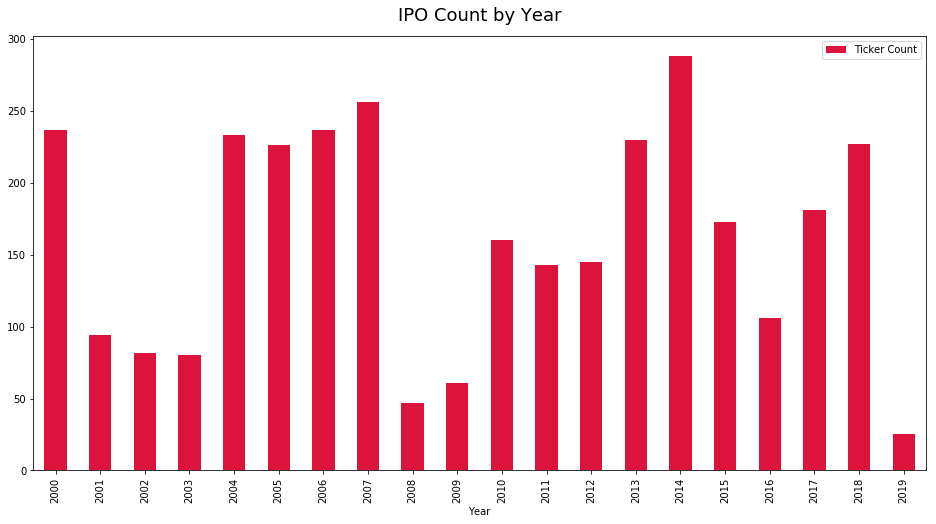

In [16]:
fig, ax = plt.subplots(figsize=(16, 8))
by_year_cnt.plot(kind='bar', ax=ax, color='crimson')
ax.legend(['Ticker Count'])
ax.set_title('IPO Count by Year', fontdict={'size':18}, y=1.02);

## Summarizing the performance of the stocks

In [17]:
# summary of the performance of the stocks over the past 19 years

summary_by_year = df.groupby('Year')['1st Day % Chg'].describe()

summary_by_year

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000,237.0,0.355621,0.557065,-0.269231,0.004464,0.162500,0.470052,2.775000
2001,93.0,0.130180,0.160606,-0.140625,0.011538,0.088542,0.229167,0.766667
2002,82.0,0.072315,0.141903,-0.330769,0.000000,0.045959,0.135866,0.666667
2003,79.0,0.120958,0.164613,-0.155455,0.002857,0.074286,0.230264,0.885556
2004,233.0,0.107347,0.165334,-0.142500,0.000000,0.052083,0.169231,1.036364
2005,226.0,0.099110,0.274405,-0.164000,0.000000,0.025357,0.143803,3.538519
2006,236.0,0.099694,0.176282,-0.295455,0.000000,0.041652,0.150852,1.254068
2007,256.0,0.115215,0.206049,-0.269091,0.000000,0.033571,0.179853,0.972222
2008,47.0,0.023182,0.134953,-0.199200,-0.034857,0.000000,0.028873,0.575000


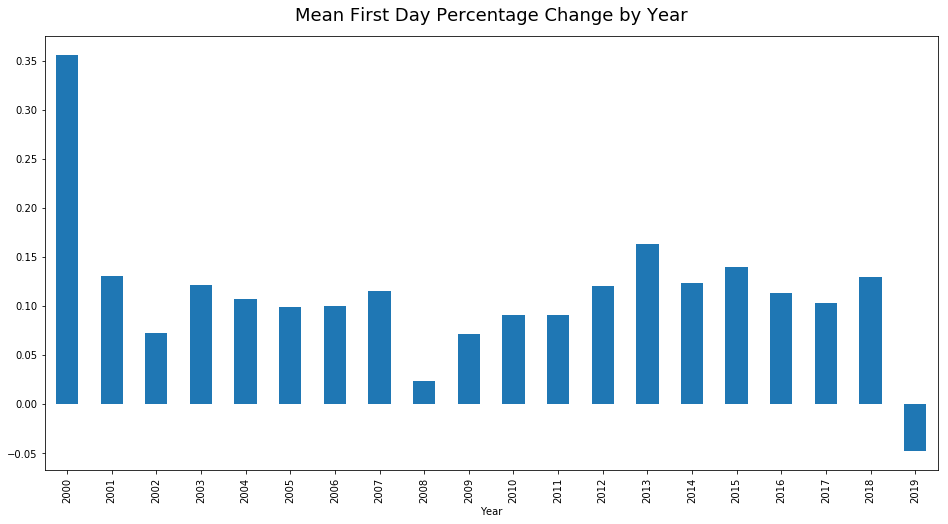

In [18]:
# every year has had a positive avg. return for first-day performance
# the import point about these no. is that they are not the first-day performance for 
# general investing public, only investors who got in on the offering could expect to see these. 
fig, ax = plt.subplots(figsize=(16,8))
summary_by_year['mean'].plot(kind='bar', ax=ax)
ax.set_title('Mean First Day Percentage Change by Year', fontdict={'size' : 18}, y=1.02);

In [19]:
summary_by_year.corr()

,count,mean,std,min,25%,50%,75%,max
count,1.000000,0.553923,0.427800,0.207478,0.525681,0.305606,0.497063,0.601779
mean,0.553923,1.000000,0.749705,0.408059,0.674226,0.867666,0.969745,0.554691
std,0.427800,0.749705,1.000000,-0.155509,0.145917,0.621326,0.710039,0.691738
min,0.207478,0.408059,-0.155509,1.000000,0.658130,0.233581,0.360426,0.196749
25%,0.525681,0.674226,0.145917,0.658130,1.000000,0.595989,0.698981,0.352586
50%,0.305606,0.867666,0.621326,0.233581,0.595989,1.000000,0.852357,0.354674
75%,0.497063,0.969745,0.710039,0.360426,0.698981,0.852357,1.000000,0.479119
max,0.601779,0.554691,0.691738,0.196749,0.352586,0.354674,0.479119,1.000000


In [20]:
# add the column to reflect the first-day return for the general public
df['1st Day Open to Close % Chg'] = ((df['1st Day Close'] - df['Opening Price']) / df['Opening Price'])

df

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week,1st Day Open to Close % Chg
0,2019-01-29,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10.0000,10.000000,10.010000,0.001000,0.000000,0.010000,1,,2019,1,29,1,0.001000
1,2019-01-30,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20.0000,20.000000,20.200000,0.010000,0.000000,0.200000,1,,2019,1,30,2,0.010000
2,2019-01-31,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14.0000,13.250000,13.070000,-0.066429,-0.750000,-0.930000,1,,2019,1,31,3,-0.013585
3,2019-01-31,Pivotal Acquisition,PVT.U,Cantor,10.0000,10.050000,10.100000,0.010000,0.050000,0.100000,1,,2019,1,31,3,0.004975
4,2019-02-01,Gores Metropoulos,GMHIU,Deutsche Bank Securities/ Credit Suisse/ Goldm...,10.0000,10.140000,10.120000,0.012000,0.140000,0.120000,1,,2019,2,1,4,-0.001972
5,2019-02-06,Wealthbridge Acquisition,HHHHU,Chardan,10.0000,10.010000,10.010000,0.001000,0.010000,0.010000,1,,2019,2,6,2,0.000000
6,2019-02-07,Alector,ALEC,Morgan Stanley/ BofA Merrill Lynch/ Cowen/ Bar...,19.0000,18.700000,18.000000,-0.052632,-0.300000,-1.000000,2,Missed,2019,2,7,3,-0.037433
7,2019-02-07,Monocle Acquisition,MNCLU,Cowen/ Chardan,10.0000,10.000000,10.010000,0.001000,0.000000,0.010000,1,,2019,2,7,3,0.001000
8,2019-02-08,Gossamer Bio,GOSS,BofA Merrill Lynch/ Leerink Partners/ Barclays...,16.0000,19.000000,17.940000,0.121250,3.000000,1.940000,2,,2019,2,8,4,-0.055789
9,2019-02-08,Harpoon Therapeutics,HARP,Citigroup/ Leerink Partners,14.0000,14.000000,13.500000,-0.035714,0.000000,-0.500000,1,,2019,2,8,4,-0.035714


In [21]:
df['1st Day Open to Close % Chg'].describe()

count    3203.000000
mean             inf
std              NaN
min        -0.492812
25%        -0.028707
50%         0.000000
75%         0.039397
max              inf
Name: 1st Day Open to Close % Chg, dtype: float64

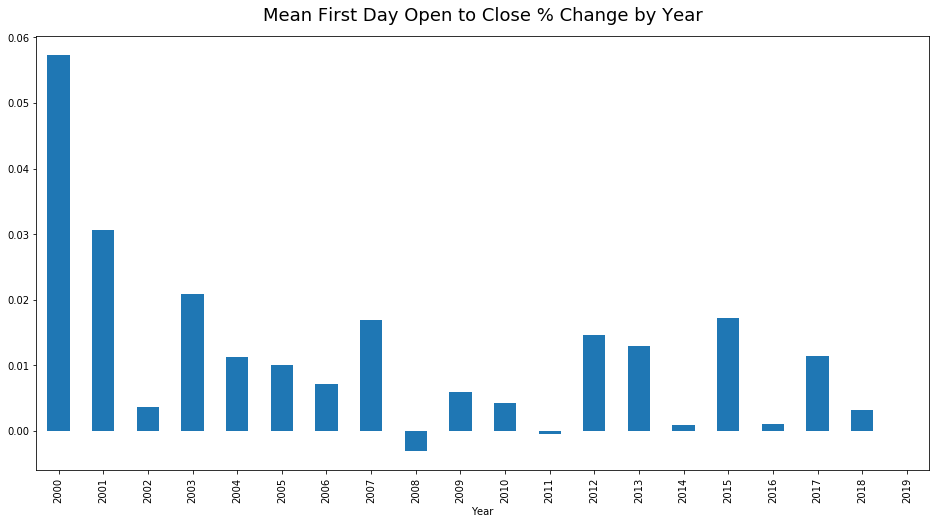

In [22]:
fig, ax = plt.subplots(figsize=(16,8))
df.groupby('Year')['1st Day Open to Close % Chg'].mean().plot(kind='bar', ax=ax)
ax.set_title('Mean First Day Open to Close % Change by Year', fontdict={'size' : 18}, y=1.02);

## Baseline IPO Strategy

In [23]:
"""
Let's now suppose that we bought one share of every IPO at the exact opening tick and sold
them at the precise closing price listed; what would the returns look like in terms of dollars
earned?
"""

df['1st Day Open to Close $ Chg'] = (df['1st Day Close'] - df['Opening Price'])
df[df['Year'] == 2018].sum()

Offer Price                      3118.315000
Opening Price                    3602.110000
1st Day Close                    3624.750000
1st Day % Chg                      28.720160
$ Chg Open                        483.795000
$ Chg Close                       519.935000
Year                           447996.000000
Month                            1464.000000
Day                              3980.000000
Day of Week                       658.000000
1st Day Open to Close % Chg         0.720086
1st Day Open to Close $ Chg        22.640000
dtype: float64

In [24]:
# We see the first day open-to-close dollar total is just aboove $22. That number is 
# for over 222 IPOs in 2018

df[df['Year']==2018]['1st Day Open to Close $ Chg'].describe()

count    222.000000
mean       0.101982
std        2.066822
min       -6.260000
25%       -0.715000
50%        0.000000
75%        0.290000
max        9.940000
Name: 1st Day Open to Close $ Chg, dtype: float64

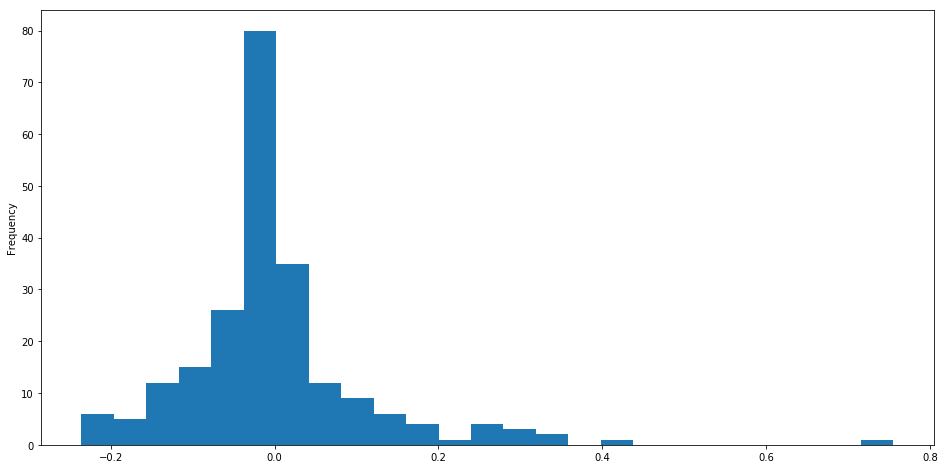

In [25]:
"""
Take a look what the distribution of returns for these IPOs look like.
It may help us understand how to improve our returns over the baseline Naive Bayes Strategy
of just buying every IPO.

We see that returns are centered around zero, but there is a long tall to the right where there
are some execeptional returns. 
"""

fig, ax = plt.subplots(figsize=(16, 8))
df[df['Year']==2018]['1st Day Open to Close % Chg'].plot(kind='hist', bins=25, ax=ax)

## Data cleansing and feature engineering

The consideration and inclusion of these factors is called feature engineering:
>What might impact the performance of an offering as it begins trading?
>Perhaps the performance of market in general or the prestige of the underwriters could impact it?
>Perhaps the day of the week or the month that it trades is important?

In [26]:
df[(df['Year']==2018) & (df['1st Day Open to Close % Chg'] >= .2)]

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week,1st Day Open to Close % Chg,1st Day Open to Close $ Chg
30,2018-01-25,Menlo Therapeutics,MNLO,Jefferies/ Piper Jaffray/ Guggenheim Securities,17.0,20.50,28.71,0.688824,3.50,11.71,2,,2018,1,25,3,0.400488,8.21
32,2018-01-26,PlayAGS,AGS,Credit Suisse/ Deutsche Bank Securities/ Jeffe...,16.0,14.00,18.50,0.156250,-2.00,2.50,1,,2018,1,26,4,0.321429,4.50
57,2018-03-16,Zscaler,ZS,Morgan Stanley/ Goldman Sachs,16.0,27.50,33.00,1.062500,11.50,17.00,3,,2018,3,16,4,0.200000,5.50
76,2018-04-27,Goosehead Insurance,GSHD,J.P. Morgan/ BofA Merrill Lynch,10.0,12.00,15.75,0.575000,2.00,5.75,1,,2018,4,27,4,0.312500,3.75
102,2018-06-15,Avalara,AVLR,Goldman Sachs/ J.P. Morgan Securities/ BofA Me...,24.0,35.00,44.94,0.872500,11.00,20.94,3,,2018,6,15,4,0.284000,9.94
103,2018-06-15,Puxin Ltd.,NEW,Citigroup/ Deutsche Bank Securities/ Barclays/...,17.0,17.00,21.00,0.235294,0.00,4.00,1,,2018,6,15,4,0.235294,4.00
109,2018-06-21,Aptinyx,APTX,J.P. Morgan/ Cowen/ Leerink Partners/ BMO Capi...,16.0,17.40,22.20,0.387500,1.40,6.20,2,,2018,6,21,3,0.275862,4.80
115,2018-06-21,Xeris Pharmaceuticals,XERS,Jefferies/ Leerink Partners/ RBC Capital Markets,15.0,15.75,20.22,0.348000,0.75,5.22,2,,2018,6,21,3,0.283810,4.47
135,2018-07-18,Crinetics Pharmaceuticals,CRNX,J.P. Morgan/ Leerink Partners/ Piper Jaffray,17.0,19.25,24.51,0.441765,2.25,7.51,2,,2018,7,18,2,0.273247,5.26
144,2018-07-25,Bloom Energy,BE,J.P. Morgan/ Morgan Stanley/ Credit Suisse/ Ke...,15.0,18.70,25.00,0.666667,3.70,10.00,2,,2018,7,25,2,0.336898,6.30


In [27]:
df.groupby(['Year', 'Star Rating'])[['1st Day % Chg']].mean()

1st Day % Chg
Year Star Rating               
2000 1.0               0.007370
     2.0               0.260831
     3.0               0.386016
     4.0               0.788099
     5.0               1.223139
2001 1.0               0.031644
     2.0               0.171825
     3.0               0.164035
     4.0               0.190701
2002 1.0              -0.007016
     2.0               0.072923
     3.0               0.168781
2003 1.0               0.025213
     2.0               0.139575
     3.0               0.162224
2004 1.0               0.024667
     2.0               0.139948
     3.0               0.216837
     4.0               0.086679
     N/C               0.180412
2005 1.0               0.020064
     2.0               0.124591
     3.0               0.181084
     4.0               2.012778
2006 1.0               0.028390
     2.0               0.107344
     3.0               0.241888
     4.0               0.438329
2007 1.0               0.007012
     2.0               0.139025
...                         ...
2012 2.0               0.084423
     3.0               0.367720
     4.0              -0.004327
2013 1.0               0.031679
     2.0               0.119913
     3.0               0.395894
2014 1.0               0.029777
     2.0               0.103160
     3.0               0.335864
     4.0               0.419534
     N/C               0.763333
2015 1.0               0.032586
     2.0               0.055419
     3.0               0.370317
     4.0               0.577083
2016 1.0               0.022467
     2.0               0.069348
     3.0               0.336191
     4.0               0.416667
2017 1.0               0.056169
     2.0               0.096066
     3.0               0.241623
     N/C               0.580000
2018 1.0               0.030500
     2.0               0.139895
     3.0               0.359849
     N/C              -0.038043
2019 1.0              -0.048600
     2.0              -0.017841
     N/C              -0.082000

[76 rows x 1 columns]

(-0.5, 0.5)

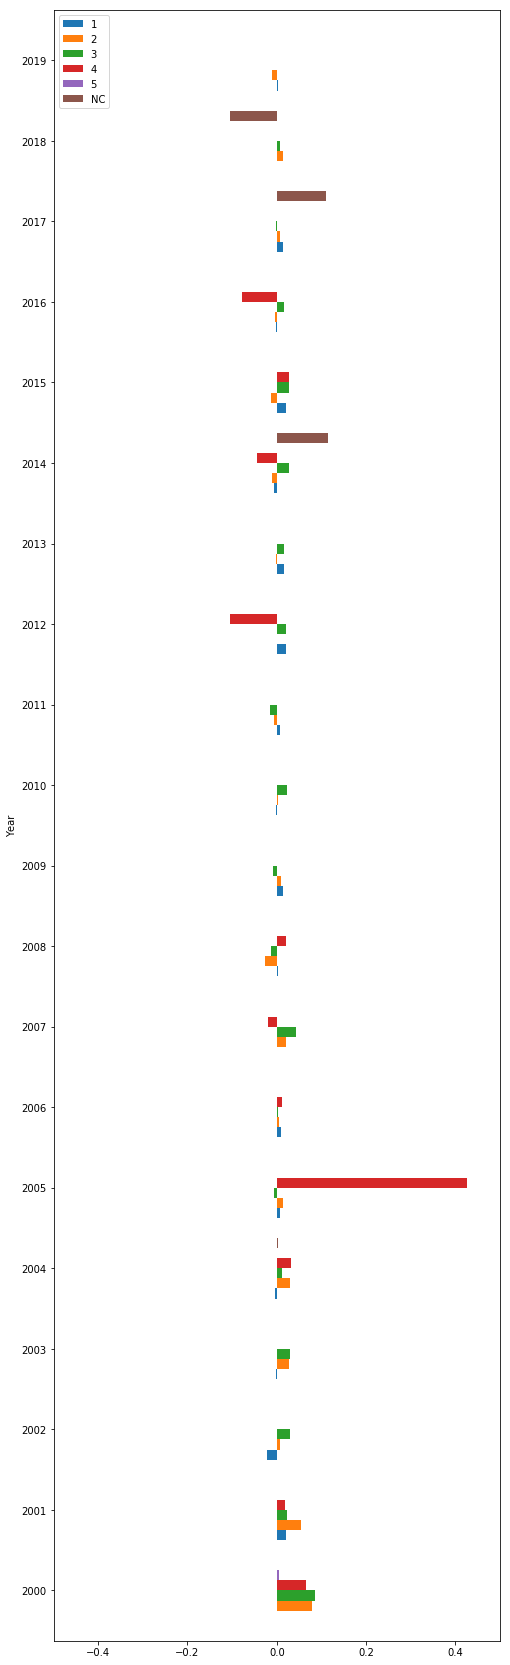

In [28]:
fig, ax = plt.subplots(figsize=(8,30))
df.groupby(['Year', 'Star Rating'])[['1st Day Open to Close % Chg']].mean().unstack() \
            .plot.barh(width=.75, ax=ax);
ax.legend(loc='best', labels=[1,2,3,4,5,'NC'])
ax.set_xlim(-.5,.5)

In [29]:
df.groupby('Year')['Star Rating'].value_counts().to_frame()

Star Rating
Year Star Rating             
2000 3.0                   90
     1.0                   59
     2.0                   45
     4.0                   35
     5.0                    8
2001 3.0                   39
     1.0                   26
     2.0                   24
     4.0                    4
2002 1.0                   33
     3.0                   27
     2.0                   22
2003 3.0                   31
     2.0                   29
     1.0                   19
2004 1.0                   98
     2.0                   83
     3.0                   49
     4.0                    2
     N/C                    1
2005 1.0                  115
     2.0                   65
     3.0                   44
     4.0                    2
2006 1.0                  123
     2.0                   63
     3.0                   44
     4.0                    6
2007 1.0                  129
     3.0                   71
...                       ...
2012 3.0                   30
     2.0                   29
     4.0                    2
2013 1.0                  109
     3.0                   71
     2.0                   49
2014 1.0                  150
     2.0                   67
     3.0                   67
     4.0                    2
     N/C                    1
2015 1.0                   98
     3.0                   45
     2.0                   25
     4.0                    5
2016 1.0                   58
     3.0                   26
     2.0                   19
     4.0                    1
2017 1.0                  103
     2.0                   47
     3.0                   27
     N/C                    3
2018 1.0                  115
     2.0                   55
     3.0                   49
     N/C                    3
2019 1.0                   17
     2.0                    3
     N/C                    2

[76 rows x 1 columns]

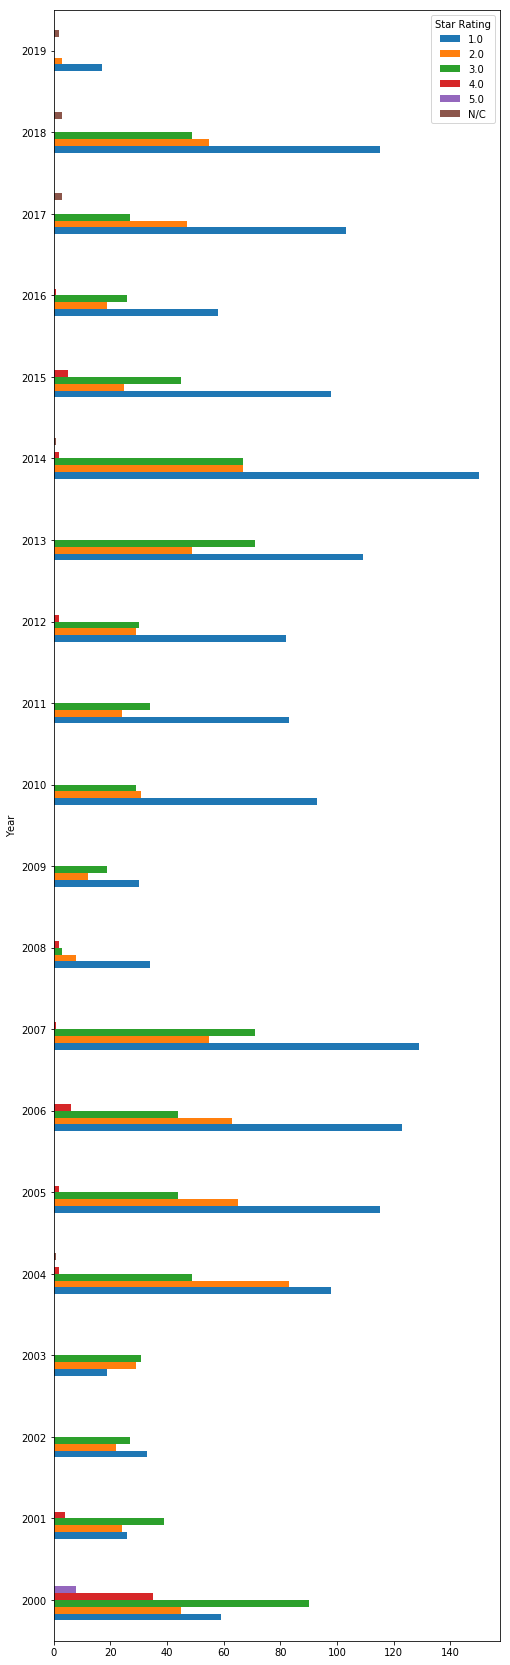

In [30]:
fig, ax = plt.subplots(figsize=(8,30))
df.groupby('Year')['Star Rating'].value_counts().unstack().plot.barh(ax=ax);

In [31]:
df

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week,1st Day Open to Close % Chg,1st Day Open to Close $ Chg
0,2019-01-29,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10.0000,10.000000,10.010000,0.001000,0.000000,0.010000,1,,2019,1,29,1,0.001000,0.010000
1,2019-01-30,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20.0000,20.000000,20.200000,0.010000,0.000000,0.200000,1,,2019,1,30,2,0.010000,0.200000
2,2019-01-31,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14.0000,13.250000,13.070000,-0.066429,-0.750000,-0.930000,1,,2019,1,31,3,-0.013585,-0.180000
3,2019-01-31,Pivotal Acquisition,PVT.U,Cantor,10.0000,10.050000,10.100000,0.010000,0.050000,0.100000,1,,2019,1,31,3,0.004975,0.050000
4,2019-02-01,Gores Metropoulos,GMHIU,Deutsche Bank Securities/ Credit Suisse/ Goldm...,10.0000,10.140000,10.120000,0.012000,0.140000,0.120000,1,,2019,2,1,4,-0.001972,-0.020000
5,2019-02-06,Wealthbridge Acquisition,HHHHU,Chardan,10.0000,10.010000,10.010000,0.001000,0.010000,0.010000,1,,2019,2,6,2,0.000000,0.000000
6,2019-02-07,Alector,ALEC,Morgan Stanley/ BofA Merrill Lynch/ Cowen/ Bar...,19.0000,18.700000,18.000000,-0.052632,-0.300000,-1.000000,2,Missed,2019,2,7,3,-0.037433,-0.700000
7,2019-02-07,Monocle Acquisition,MNCLU,Cowen/ Chardan,10.0000,10.000000,10.010000,0.001000,0.000000,0.010000,1,,2019,2,7,3,0.001000,0.010000
8,2019-02-08,Gossamer Bio,GOSS,BofA Merrill Lynch/ Leerink Partners/ Barclays...,16.0000,19.000000,17.940000,0.121250,3.000000,1.940000,2,,2019,2,8,4,-0.055789,-1.060000
9,2019-02-08,Harpoon Therapeutics,HARP,Citigroup/ Leerink Partners,14.0000,14.000000,13.500000,-0.035714,0.000000,-0.500000,1,,2019,2,8,4,-0.035714,-0.500000


In [32]:
df['Offer Price'].describe()

count    3204.000000
mean       14.525502
std         6.227963
min         5.000000
25%        10.000000
50%        14.000000
75%        18.000000
max        91.000000
Name: Offer Price, dtype: float64

## Adding features to influence the performance of the an IPO

In [33]:
# opening gap: the differnce between the offer price and the opening price of the issue
df['Opening Gap % Chg'] = (df['Opening Price'] - df['Offer Price']) / df['Offer Price']

In [34]:
"""
Let's get a count of the number of underwriters on the offering.
Perhaps having more banks involved leads to better marketing of the issue?
"""
def get_mgr_count(x):
    return len(x.split('/'))

df['Mgr Count'] = df['Managers'].apply(get_mgr_count)

df

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week,1st Day Open to Close % Chg,1st Day Open to Close $ Chg,Opening Gap % Chg,Mgr Count
0,2019-01-29,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10.0000,10.000000,10.010000,0.001000,0.000000,0.010000,1,,2019,1,29,1,0.001000,0.010000,0.000000,2
1,2019-01-30,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20.0000,20.000000,20.200000,0.010000,0.000000,0.200000,1,,2019,1,30,2,0.010000,0.200000,0.000000,6
2,2019-01-31,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14.0000,13.250000,13.070000,-0.066429,-0.750000,-0.930000,1,,2019,1,31,3,-0.013585,-0.180000,-0.053571,2
3,2019-01-31,Pivotal Acquisition,PVT.U,Cantor,10.0000,10.050000,10.100000,0.010000,0.050000,0.100000,1,,2019,1,31,3,0.004975,0.050000,0.005000,1
4,2019-02-01,Gores Metropoulos,GMHIU,Deutsche Bank Securities/ Credit Suisse/ Goldm...,10.0000,10.140000,10.120000,0.012000,0.140000,0.120000,1,,2019,2,1,4,-0.001972,-0.020000,0.014000,3
5,2019-02-06,Wealthbridge Acquisition,HHHHU,Chardan,10.0000,10.010000,10.010000,0.001000,0.010000,0.010000,1,,2019,2,6,2,0.000000,0.000000,0.001000,1
6,2019-02-07,Alector,ALEC,Morgan Stanley/ BofA Merrill Lynch/ Cowen/ Bar...,19.0000,18.700000,18.000000,-0.052632,-0.300000,-1.000000,2,Missed,2019,2,7,3,-0.037433,-0.700000,-0.015789,4
7,2019-02-07,Monocle Acquisition,MNCLU,Cowen/ Chardan,10.0000,10.000000,10.010000,0.001000,0.000000,0.010000,1,,2019,2,7,3,0.001000,0.010000,0.000000,2
8,2019-02-08,Gossamer Bio,GOSS,BofA Merrill Lynch/ Leerink Partners/ Barclays...,16.0000,19.000000,17.940000,0.121250,3.000000,1.940000,2,,2019,2,8,4,-0.055789,-1.060000,0.187500,4
9,2019-02-08,Harpoon Therapeutics,HARP,Citigroup/ Leerink Partners,14.0000,14.000000,13.500000,-0.035714,0.000000,-0.500000,1,,2019,2,8,4,-0.035714,-0.500000,0.000000,2


In [35]:
df['Mgr Count'].describe().to_frame()

,Mgr Count
count,3204.000000
mean,2.151373
std,1.264020
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,13.000000


In [36]:
df.groupby('Mgr Count')['1st Day Open to Close % Chg'].count().to_frame()

,1st Day Open to Close % Chg
Mgr Count,
1,1008
2,1316
3,568
4,182
5,59
6,32
7,11
8,11
9,5


In [37]:
df.groupby('Mgr Count')['1st Day Open to Close % Chg'].mean().to_frame(). \
style.bar(align='mid', color=['#d65f5f', '#5fba7d'])

/anaconda3/envs/forecast-ipos/lib/python3.6/site-packages/pandas/io/formats/style.py:1034: RuntimeWarning: invalid value encountered in true_divide
  normed = width * (s.values - smin) / (smax - smin + 1e-12)


,1st Day Open to Close % Chg
Mgr Count,
1,0.0156469
2,inf
3,0.0104006
4,0.0176629
5,0.00877767
6,-0.00118899
7,0.00168384
8,0.00378158
9,0.0812138


In [38]:
df

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week,1st Day Open to Close % Chg,1st Day Open to Close $ Chg,Opening Gap % Chg,Mgr Count
0,2019-01-29,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10.0000,10.000000,10.010000,0.001000,0.000000,0.010000,1,,2019,1,29,1,0.001000,0.010000,0.000000,2
1,2019-01-30,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20.0000,20.000000,20.200000,0.010000,0.000000,0.200000,1,,2019,1,30,2,0.010000,0.200000,0.000000,6
2,2019-01-31,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14.0000,13.250000,13.070000,-0.066429,-0.750000,-0.930000,1,,2019,1,31,3,-0.013585,-0.180000,-0.053571,2
3,2019-01-31,Pivotal Acquisition,PVT.U,Cantor,10.0000,10.050000,10.100000,0.010000,0.050000,0.100000,1,,2019,1,31,3,0.004975,0.050000,0.005000,1
4,2019-02-01,Gores Metropoulos,GMHIU,Deutsche Bank Securities/ Credit Suisse/ Goldm...,10.0000,10.140000,10.120000,0.012000,0.140000,0.120000,1,,2019,2,1,4,-0.001972,-0.020000,0.014000,3
5,2019-02-06,Wealthbridge Acquisition,HHHHU,Chardan,10.0000,10.010000,10.010000,0.001000,0.010000,0.010000,1,,2019,2,6,2,0.000000,0.000000,0.001000,1
6,2019-02-07,Alector,ALEC,Morgan Stanley/ BofA Merrill Lynch/ Cowen/ Bar...,19.0000,18.700000,18.000000,-0.052632,-0.300000,-1.000000,2,Missed,2019,2,7,3,-0.037433,-0.700000,-0.015789,4
7,2019-02-07,Monocle Acquisition,MNCLU,Cowen/ Chardan,10.0000,10.000000,10.010000,0.001000,0.000000,0.010000,1,,2019,2,7,3,0.001000,0.010000,0.000000,2
8,2019-02-08,Gossamer Bio,GOSS,BofA Merrill Lynch/ Leerink Partners/ Barclays...,16.0000,19.000000,17.940000,0.121250,3.000000,1.940000,2,,2019,2,8,4,-0.055789,-1.060000,0.187500,4
9,2019-02-08,Harpoon Therapeutics,HARP,Citigroup/ Leerink Partners,14.0000,14.000000,13.500000,-0.035714,0.000000,-0.500000,1,,2019,2,8,4,-0.035714,-0.500000,0.000000,2


In [39]:
# let'move on to extracting the first underwriter in the list
df['Lead Mgr'] = df['Managers'].apply(lambda x: x.split('/')[0])

In [40]:
df

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,...,Performed,Year,Month,Day,Day of Week,1st Day Open to Close % Chg,1st Day Open to Close $ Chg,Opening Gap % Chg,Mgr Count,Lead Mgr
0,2019-01-29,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10.0000,10.000000,10.010000,0.001000,0.000000,0.010000,...,,2019,1,29,1,0.001000,0.010000,0.000000,2,Cowen
1,2019-01-30,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20.0000,20.000000,20.200000,0.010000,0.000000,0.200000,...,,2019,1,30,2,0.010000,0.200000,0.000000,6,UBS Investment Bank
2,2019-01-31,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14.0000,13.250000,13.070000,-0.066429,-0.750000,-0.930000,...,,2019,1,31,3,-0.013585,-0.180000,-0.053571,2,Morgan Stanley
3,2019-01-31,Pivotal Acquisition,PVT.U,Cantor,10.0000,10.050000,10.100000,0.010000,0.050000,0.100000,...,,2019,1,31,3,0.004975,0.050000,0.005000,1,Cantor
4,2019-02-01,Gores Metropoulos,GMHIU,Deutsche Bank Securities/ Credit Suisse/ Goldm...,10.0000,10.140000,10.120000,0.012000,0.140000,0.120000,...,,2019,2,1,4,-0.001972,-0.020000,0.014000,3,Deutsche Bank Securities
5,2019-02-06,Wealthbridge Acquisition,HHHHU,Chardan,10.0000,10.010000,10.010000,0.001000,0.010000,0.010000,...,,2019,2,6,2,0.000000,0.000000,0.001000,1,Chardan
6,2019-02-07,Alector,ALEC,Morgan Stanley/ BofA Merrill Lynch/ Cowen/ Bar...,19.0000,18.700000,18.000000,-0.052632,-0.300000,-1.000000,...,Missed,2019,2,7,3,-0.037433,-0.700000,-0.015789,4,Morgan Stanley
7,2019-02-07,Monocle Acquisition,MNCLU,Cowen/ Chardan,10.0000,10.000000,10.010000,0.001000,0.000000,0.010000,...,,2019,2,7,3,0.001000,0.010000,0.000000,2,Cowen
8,2019-02-08,Gossamer Bio,GOSS,BofA Merrill Lynch/ Leerink Partners/ Barclays...,16.0000,19.000000,17.940000,0.121250,3.000000,1.940000,...,,2019,2,8,4,-0.055789,-1.060000,0.187500,4,BofA Merrill Lynch
9,2019-02-08,Harpoon Therapeutics,HARP,Citigroup/ Leerink Partners,14.0000,14.000000,13.500000,-0.035714,0.000000,-0.500000,...,,2019,2,8,4,-0.035714,-0.500000,0.000000,2,Citigroup


In [41]:
df.groupby('Lead Mgr').agg({'1st Day Open to Close % Chg': ['mean', len]}) \
.sort_values(by=('1st Day Open to Close % Chg', 'len'))

1st Day Open to Close % Chg  \
                                                                          mean   
Lead Mgr                                                                         
  Morgan Stanley                                                      0.002125   
J.P. Morghan                                                          0.018699   
JMP Securitites                                                       0.069565   
​Credit Suisse                                                       -0.001990   
JP Turner                                                            -0.022222   
Jefferies & Company                                                   0.096552   
Jefferies Broadview                                                  -0.002491   
Jefferirs                                                             0.083750   
Johnson Rice                                                         -0.027895   
Johnson Rice & Company                                               -0.087500   
Joseph Gunnar & Co.                                                   0.012500   
J.P. Morgan Securities Merrill Lynch                                  0.103448   
Keefe Bruyette                                                       -0.108333   
Keefe, Bruyette                                                      -0.045070   
Keefe, Bruyette & Woods (A Stifel Company) Sand...                    0.000000   
LG Investment & Securities                                           -0.024306   
Ladenburg, Thalmann                                                   0.008333   
MDB Capital Group, LLC                                                0.113684   
MSDW                                                                  0.028409   
Macquarie Capital                                                     0.001982   
Maxim Group                                                          -0.139726   
Maxin Group                                                           0.000000   
Maxium CapitalEarlybird Capital                                       0.018000   
Keefe Bruyette & Woods (A Stifel Company )                           -0.003283   
J.P. Morgan Securities                                               -0.022333   
J.P.  Morgan                                                          0.027116   
J.P Morgan                                                           -0.031998   
Feltl & Company                                                      -0.018868   
Feltl and Company                                                    -0.250273   
Ferris, Baker Watts                                                   0.000000   
...                                                                        ...   
Cowen                                                                 0.001448   
CIBC World Markets                                                   -0.008638   
Goldman Sachs (Asia)                                                 -0.035101   
Maxim Group                                                           0.014581   
JP Morgan                                                            -0.007058   
Morgan Stanley Dean Witter                                           -0.015770   
Raymond James                                                         0.011402   
Bear Stearns                                                          0.019274   
Salomon Smith Barney                                                  0.033268   
Friedman Billings Ramsey                                              0.019725   
Deutsche Bank                                                        -0.008761   
Banc of America                                                       0.010041   
JPMorgan                                                              0.003202   
Piper Jaffray                                                         0.005394   
EarlyBirdCapital                                                      0.001795   
Citi                             

In [42]:
df['Lead Mgr'].unique()

array(['Cowen', 'UBS Investment Bank', 'Morgan Stanley', 'Cantor',
       'Deutsche Bank Securities', 'Chardan', 'BofA Merrill Lynch',
       'Citigroup', 'Dawson James Securities', 'Jefferies',
       'Laidlaw & Company (UK) Ltd.', 'Goldman Sachs',
       'Northland Capital', 'Barclays', 'Nomura', 'Ladenburg Thalmann',
       'B. Riley FBR', 'Credit Suisse', 'J.P. Morgan', 'EarlyBirdCapital',
       'Roth Capital Partners', 'Oppenheimer & Co.', '\u200bJefferies',
       'Piper Jaffray', "Sandler O'Neill & Partners",
       'Goldman Sachs (Asia)', 'Network 1 Financial Securities',
       'Oppenheimer', 'Raymond James', 'Stifel', 'Wells Fargo Securities',
       'Baird', 'Stephens', 'Benchmark', 'Leerink Partners',
       'Evercore ISI', 'Maxim Group ', '\u200bCredit Suisse',
       'Keefe, Bruyette & Woods (A Stifel Company)', 'Cowen and Company',
       'BMO Capital Markets', 'Joseph Gunnar & Co.', 'CICC',
       'Maxim Group', "Sandler O'Neill + Partners", 'National Securities',
    

## Binary classification with logistic regression

> attempt to predict whether the IPO will be one we should buy for a trade or not

In [43]:
# using statistical model
from patsy import dmatrix

## Creating the target model

In [44]:
# tell the model that we should invest in any IPO that has a 2.5% or greater return on Day one
y = df['1st Day Open to Close % Chg'].apply(lambda x: 1 if x > .025 else 0)

In [45]:
"""
Using patsy to setup the predictor variables,
the Qs are simply used to provide quotes in the formula for columns that have white space in their names,
the Cs are used to indicate that the referenced col. should be treated as categorical features and dummny coded.
"""

X = dmatrix("Q('Opening Gap % Chg') + C(Q('Month'), Treatment) + C(Q('Day of Week'),Treatment) \
+ Q('Mgr Count') + Q('Lead Mgr') + Q('Offer Price') + C(Q('Star Rating'), Treatment)", df,
return_type="dataframe")

In [46]:
X

,Intercept,"C(Q('Month'), Treatment)[T.2]","C(Q('Month'), Treatment)[T.3]","C(Q('Month'), Treatment)[T.4]","C(Q('Month'), Treatment)[T.5]","C(Q('Month'), Treatment)[T.6]","C(Q('Month'), Treatment)[T.7]","C(Q('Month'), Treatment)[T.8]","C(Q('Month'), Treatment)[T.9]","C(Q('Month'), Treatment)[T.10]",...,Q('Lead Mgr')[T.​Credit Suisse],Q('Lead Mgr')[T.​Jefferies],"C(Q('Star Rating'), Treatment)[T.2.0]","C(Q('Star Rating'), Treatment)[T.3.0]","C(Q('Star Rating'), Treatment)[T.4.0]","C(Q('Star Rating'), Treatment)[T.5.0]","C(Q('Star Rating'), Treatment)[T.N/C]",Q('Opening Gap % Chg'),Q('Mgr Count'),Q('Offer Price')
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.0,10.0000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6.0,20.0000
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.053571,2.0,14.0000
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005000,1.0,10.0000
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014000,3.0,10.0000
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001000,1.0,10.0000
6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.015789,4.0,19.0000
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.0,10.0000
8,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.187500,4.0,16.0000
9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.0,14.0000


In [47]:
# using the last 200 IPOs to train/test
from sklearn.linear_model import LogisticRegression

X_train = X[:-200]
y_train = y[:-200]

X_test = X[-200:]
y_test = y[-200:]

clf = LogisticRegression()
clf.fit(X_train, y_train)

/anaconda3/envs/forecast-ipos/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Examining the model performance

In [48]:
y_hat = clf.predict(X_test)
y_true = y_test

In [49]:
pdf = pd.DataFrame({'y_true': y_true, 'y_hat': y_hat})

In [50]:
pdf['correct'] = pdf.apply(lambda x: 1 if x['y_true'] == x['y_hat'] else 0, axis=1)

In [51]:
pdf

,y_true,y_hat,correct
3004,1,1,1
3005,0,0,1
3006,0,0,1
3007,0,0,1
3008,0,0,1
3009,1,1,1
3010,1,0,0
3011,0,0,1
3012,1,0,0
3013,0,1,0


In [52]:
# look at what percentage of the 200 IPOs in the test dataset
pdf['y_true'].value_counts(normalize=True)

1    0.51
0    0.49
Name: y_true, dtype: float64

In [53]:
pdf['correct'].value_counts(normalize=True)

1    0.51
0    0.49
Name: correct, dtype: float64

In [54]:
pdf[(pdf['y_hat']==1)]['correct'].value_counts(normalize=True)

1    0.5625
0    0.4375
Name: correct, dtype: float64

In [55]:
pdf[(pdf['y_hat']==1)]['correct'].describe()

count    32.000000
mean      0.562500
std       0.504016
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: correct, dtype: float64

In [56]:
results = pd.merge(df[['1st Day Open to Close $ Chg']], pdf, left_index=True, right_index=True)

results

,1st Day Open to Close $ Chg,y_true,y_hat,correct
3004,9.125000,1,1,1
3005,-15.875000,0,0,1
3006,-1.343750,0,0,1
3007,-2.062500,0,0,1
3008,-1.234375,0,0,1
3009,20.609375,1,1,1
3010,2.375000,1,0,0
3011,-3.187500,0,0,1
3012,0.875000,1,0,0
3013,0.000000,0,1,0


In [57]:
# we would gain over $215 in an ideal cost-free scenario
results['1st Day Open to Close $ Chg'].sum()

215.71875

In [58]:
results['1st Day Open to Close $ Chg'].describe()

count    200.000000
mean       1.078594
std        4.136920
min      -15.875000
25%       -0.578125
50%        0.312500
75%        1.902344
max       20.609375
Name: 1st Day Open to Close $ Chg, dtype: float64

In [59]:
# ipo buys
results[results['y_hat']==1]['1st Day Open to Close $ Chg'].sum()

45.1875

In [60]:
# ipos buys
results[results['y_hat']==1]['1st Day Open to Close $ Chg'].describe()

count    32.000000
mean      1.412109
std       6.498153
min      -9.875000
25%      -1.906250
50%       0.507812
75%       4.097656
max      20.609375
Name: 1st Day Open to Close $ Chg, dtype: float64

In [61]:
# ipo buys that made money
results[(results['y_true']==1) & results['y_hat']==1]['1st Day Open to Close $ Chg'].sum()

93.84375

In [62]:
# ipo buys that made money
results[(results['y_true']==1) & results['y_hat']==1]['1st Day Open to Close $ Chg'].describe()

count    18.000000
mean      5.213542
std       5.764894
min       0.250000
25%       0.671875
50%       2.929688
75%       8.531250
max      20.609375
Name: 1st Day Open to Close $ Chg, dtype: float64

In [63]:
# ipo buys that lost money
results[(results['y_true']==0) & results['y_hat']==1]['1st Day Open to Close $ Chg'].sum()

-48.65625

In [64]:
# ipo buys that lost money
results[(results['y_true']==0) & results['y_hat']==1]['1st Day Open to Close $ Chg'].describe()

count    14.000000
mean     -3.475446
std       3.390903
min      -9.875000
25%      -4.078125
50%      -2.250000
75%      -1.609375
max       0.000000
Name: 1st Day Open to Close $ Chg, dtype: float64

In [65]:
# ipo not bought that would have made money
results[(results['y_true']==1) & results['y_hat']==0]['1st Day Open to Close $ Chg'].sum()

121.875

In [66]:
# ipo not bought that would have made money
results[(results['y_true']==1) & results['y_hat']==0]['1st Day Open to Close $ Chg'].describe()

count    182.000000
mean       0.669643
std        3.718351
min      -15.875000
25%       -0.804688
50%        0.203125
75%        1.546875
max       15.062500
Name: 1st Day Open to Close $ Chg, dtype: float64

## Generating the predictor coefficients feature

In [67]:
fv = pd.DataFrame(X_train.columns, clf.coef_.T).reset_index()
fv.columns = ['Coef', 'Feature']
fv.sort_values('Coef', ascending=0).reset_index(drop=True)

,Coef,Feature
0,1.342160,Q('Lead Mgr')[T.BMO Capital Markets]
1,1.300063,"Q('Lead Mgr')[T.C.E. Unterberg, Towbin]"
2,1.139009,Q('Lead Mgr')[T. J.P. Morgan]
3,1.042899,Q('Lead Mgr')[T.Joseph Gunnar]
4,1.026833,Q('Lead Mgr')[T.Laidlaw & Company (UK) Ltd.]
5,0.962223,Q('Lead Mgr')[T.EarlyBridCapital]
6,0.902976,Q('Lead Mgr')[T.Deutsche Banc Alex Brown]
7,0.894894,Q('Opening Gap % Chg')
8,0.891937,Q('Lead Mgr')[T.Sandler ONeill & Partners]
9,0.878635,"Q('Lead Mgr')[T.Keefe, Bruyette & Woods]"


In [68]:
"""
the first day of Mon coded as T.0 and all other days of the week compared to Monday,
that Thursday appears to be the best day of the weeks and Saturday appears to be a terrible day
"""
fv[fv['Feature'].str.contains('Day')]

,Coef,Feature
12,-0.074780,"C(Q('Day of Week'), Treatment)[T.1]"
13,0.057087,"C(Q('Day of Week'), Treatment)[T.2]"
14,0.198912,"C(Q('Day of Week'), Treatment)[T.3]"
15,0.049425,"C(Q('Day of Week'), Treatment)[T.4]"
16,-0.204267,"C(Q('Day of Week'), Treatment)[T.5]"
17,-0.176009,"C(Q('Day of Week'), Treatment)[T.6]"


In [69]:
fv[fv['Feature'].str.contains('Month')]

,Coef,Feature
1,0.091996,"C(Q('Month'), Treatment)[T.2]"
2,0.107940,"C(Q('Month'), Treatment)[T.3]"
3,0.100235,"C(Q('Month'), Treatment)[T.4]"
4,0.124367,"C(Q('Month'), Treatment)[T.5]"
5,0.148571,"C(Q('Month'), Treatment)[T.6]"
6,-0.079544,"C(Q('Month'), Treatment)[T.7]"
7,0.276259,"C(Q('Month'), Treatment)[T.8]"
8,0.241351,"C(Q('Month'), Treatment)[T.9]"
9,-0.152921,"C(Q('Month'), Treatment)[T.10]"
10,0.186680,"C(Q('Month'), Treatment)[T.11]"


## Random forest classifer method

In [70]:
"""
Using RF to extract and sort the importance of the features and graph those values
with the error bars.
From the data, what has the most impact on the model is the opening gap, the offer price, and
the number of managers involved in the deal.
"""
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=1000)
clf_rf.fit(X_train, y_train)

f_importances = clf_rf.feature_importances_

f_names = X_train.columns
f_std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)

zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)

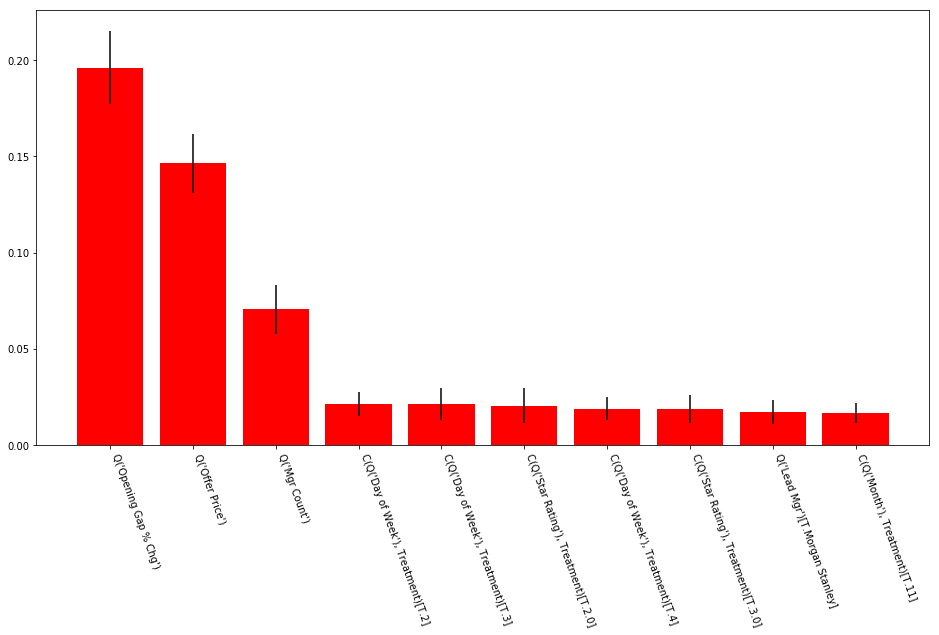

In [71]:
n_features = 10
imps = [x[0] for x in zzs[:n_features]]
labels = [x[1] for x in zzs[:n_features]]
errs = [x[2] for x in zzs[:n_features]]

fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(range(n_features), imps, color="r", yerr=errs)
plt.xticks(range(n_features), labels)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-70, ha="left");

In [72]:
signature